In [1]:
import copernicusmarine as cm
import json
from pprint import pprint
cm.__version__
username = 'ldrouineau'
password = 'Mozart78!'

In [5]:
help(cm.get)

Help on function get in module copernicusmarine.python_interface.get:

get(dataset_url: Optional[str] = None, dataset_id: Optional[str] = None, dataset_version: Optional[str] = None, dataset_part: Optional[str] = None, username: Optional[str] = None, password: Optional[str] = None, no_directories: bool = False, show_outputnames: bool = False, output_directory: Union[pathlib.Path, str, NoneType] = None, credentials_file: Union[pathlib.Path, str, NoneType] = None, force_download: bool = False, overwrite_output_data: bool = False, request_file: Union[pathlib.Path, str, NoneType] = None, service: Optional[str] = None, overwrite_metadata_cache: bool = False, no_metadata_cache: bool = False, filter: Optional[str] = None, regex: Optional[str] = None, file_list: Union[pathlib.Path, str, NoneType] = None, create_file_list: Optional[str] = None, download_file_list: bool = False, index_parts: bool = False, sync: bool = False, sync_delete: bool = False, disable_progress_bar: bool = False, staging:

In [8]:
cm.get(
  dataset_id="cmems_obs-ins_glo_phybgcwav_mynrt_na_irr",
        username = username,
    password = password,
    dataset_part  = 'history',
    filter = '*GL_TS_TG_BrestTG_60minute.nc'
)

INFO - 2024-12-16T09:54:22Z - Cache could not be loaded. Retrying without cache. If the problem with the cache persists, try running copernicusmarine describe --overwrite-metadata-cache
Fetching catalog: 100%|██████████| 3/3 [00:06<00:00,  2.22s/it]
INFO - 2024-12-16T09:54:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-12-16T09:54:29Z - You forced selection of dataset part "history"
INFO - 2024-12-16T09:54:29Z - Service was not specified, the default one was selected: "original-files"
INFO - 2024-12-16T09:54:29Z - Downloading using service original-files...
INFO - 2024-12-16T09:54:43Z - You requested the download of the following files:
s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/GL_TS_TG_BrestTG_60minute.nc - 3.55 MB - 2024-12-03T13:05:35Z

Total size of the download: 3.55 MB


Do you want to proceed with download? [Y/n]:

  Y


100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


[PosixPath('INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/GL_TS_TG_BrestTG_60minute.nc')]

In [15]:
import xarray as xr
ds = xr.open_dataset('INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/GL_TS_TG_BrestTG_60minute.nc')

/tmp/ipykernel_1190/4268036882.py:5: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_numeric = (time - time[0]).astype("timedelta64[D]").astype(float)


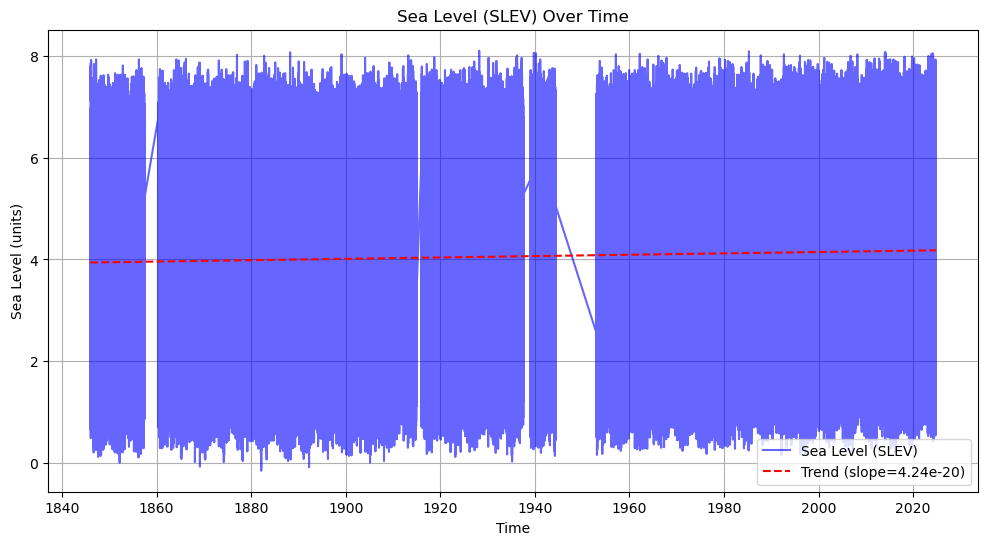

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Convert TIME to numeric (e.g., days since the first observation)
time_numeric = (time - time[0]).astype("timedelta64[D]").astype(float)

# Drop NaN values for regression
valid = ~slev.isnull()
time_numeric_clean = time_numeric[valid]
slev_clean = slev[valid]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(time_numeric_clean, slev_clean)

# Create regression line
regression_line = slope * time_numeric_clean + intercept

# Plot the original data and the regression line
plt.figure(figsize=(12, 6))
plt.plot(time, slev, label="Sea Level (SLEV)", color="blue", alpha=0.6)
plt.plot(time[valid], regression_line, label=f"Trend (slope={slope:.2e})", color="red", linestyle="--")

# Customize the plot
plt.title("Sea Level (SLEV) Over Time")
plt.xlabel("Time")
plt.ylabel("Sea Level (units)")  # Replace "units" with the actual units of SLEV
plt.grid(True)
plt.legend()
plt.show()